## 分析A/B测试结果

我们设计项目的初衷是希望让它涵盖数学和Python课程里所有的内容，涉及到可视化的部分，需要同学对Python相关的可视化库有了解，所以项目会有难度。如果你进行不顺利，不用着急，你可以回顾以前课程中的内容，或者寻求帮助。如果你成功完成项目，代表你已掌握这部分内容。祝你好运！

## 目录
- [简介](#intro)
- [I - 统计与概率](#probability)
- [II - A/B 测试](#ab_test)


<a id='intro'></a>
### 简介

A/B 测试是数据分析师和数据科学家需要经常完成的工作，非常重要。如果你在工作中有一些实践经验，那学习起来就会更加游刃有余。

本项目设定了一家电子商务网站运行 A/B 测试的情境。你的目标是通过这个项目来帮助公司分析和决定他们是否应该使用新的页面，保留旧的页面，或者应该将测试时间延长，之后再做出决定。

**注意，最后做完项目时记得检查，
    
<a id='probability'></a>
#### I - 概率

先导入数据。

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` 导入 `ab_data.csv` 数据，并将其存储在 `df` 中。  你可以直接进行以下问题的回答。

a. 导入数据集，查看前几行数据：

b. 查看数据集的行数。

c. 查看数据集中的用户数量（不同的user_id数）。

d. 转化用户的占比。

e. 请计算数据中 `new_page` 与 `treatment` 不匹配的次数。提示：在一个合理的实验设计里，控制组(control) 应该对应旧页面(old_page)，实验组(treatment) 对应新页面(new_page)。


f. 是否有任何行空缺数值？

`2.` 对于 **treatment** 和 **new_page** 不匹配的行或 **control** 与 **old_page** 不匹配的行，我们不能确定该行是否接收到了新页面还是旧页面。如何处理这些行？

a. 现在，去创建一个符合要求的新数据集。将新 dataframe 存储在 **df2** 中。

In [ ]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

`3.` 根据 **df2** 来回答以下问题。

a.  **df2** 中的用户数量（不同的 **user_id**) ?

b.  **df2** 中有一个重复的 **user_id** 。它是什么？

c. 这个重复  **user_id** 的行信息是什么？

d. 删除一行重复行，但仍然存储 dataframe 为 **df2**。

`4.` 使用优化过的 **df2** 来回答以下问题。

a. 用户成功转化的整体概率是多少？（不分旧页面或者新页面）

b. `control` 组用户的转化率是多少？

c. `treatment` 组用户的转化率是多少？

d. 一个用户收到新页面的概率是多少？

e. 分析到这里，你是否认为有足够的数据支持来证明旧页面或者新页面可以带来更高的转化率？

**在这里写出你的答案。**

<a id='ab_test'></a>
### II - A/B 测试

因为每个事件都对应有一个时间记录（time stamp 时间戳），所以技术上你可以实现每次观察都连续运行假设检验。

然而，问题的难点在于，什么时候停止你的试验：是在发现其中一组的试验效果足够好时立即停止？还是在这样的观察结果又持续发生了一段时间再停止？需要运行多长时间才能确认两个页面没有带来用户转化率的显著差异？这些问题是 A/B 测试中最难的部分，但我们相信你可以通过这个项目了解这些问题的思考方向。

`1.` 现在，你需要根据我们提供的数据做出决策：你假设旧页面效果更佳，除非在一类错误在5%以内，新页面被证明更好。基于此，你的零假设和备择假设是什么？ 你可以用文字表述或用 **$p_{old}$** 与 **$p_{new}$** （即，旧页面转化率与新页面转化率）来陈述你的假设。

**在这里给出你的答案。**

`2.` 假定在零假设中，不管是新页面还是旧页面， $p_{new}$ 与 $p_{old}$ 都有相同的转化成功的概率，也就是说，  $p_{new}$ 与 $p_{old}$ 是相等的。此外，我们还假设它们都等于**ab_data.csv** 中的 **转化率(converted)**。  <br>

现在，在新旧页面上执行抽样分布，并计算 **转化(converted)** 差异。记住，每个页面的样本大小要与 **ab_data.csv** 相同。计算零假设中10000次迭代计算的估计值。  <br>

使用下面的单元格提供这个模拟试验的内容。如果不太理解如何进行模拟，不要担心，你可以通过回答下面的问题来理清思路。<br>

a. 在零假设中，$p_{new}$ **转化率** 是多少？

b. 在零假设中， $p_{old}$ **转化率** 是多少？ 

c.  $n_{new}$ 是多少？

d.  $n_{old}$?是多少？

e. 在零假设中，使用 $p_{new}$ （新页面的转化率）模拟 $n_{new}$ 个新页面的转化，并将这些 $n_{new}$ 个 1 和 0 存储在 **new_page_converted** 中。(提示：可以使用  [numpy.random.choice](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)。)

f. 在零假设中，使用 $p_{old}$ （旧页面的转化率）模拟 $n_{old}$ 个旧页面的转化，并将这些  $n_{old}$ 个 1 和 0 存储在 **old_page_converted** 中。

g. 根据 e 和 f，计算 $p_{new}$ 和 $p_{old}$ 的差异值（$p_{new}$ - $p_{old}$）。

h. 由于单个数值不能形成分布图形，请参考以上a-g的过程，模拟 10,000 个 $p_{new}$ 与 $p_{old}$ 差异值（$p_{new}$ - $p_{old}$），将这 10,000 个值存储在 **p_diffs** 中。

i. 绘制一个 **p_diffs** 分布图形。图形跟你的预期相符吗？

j.  **p_diffs**列表的数值中，有多少比例的数值会大于 **ab_data.csv** 中观察到的实际**转化率差异** ？

k. 用文字解释一下你刚才在 **j.** 中计算出来的结果。在数据研究中，这个值是什么？ 根据这个数值，请判断新旧页面的转化率是否有显著差异。

**在这里给出你的答案。**


l. 我们也可以使用一个内置程序 （built-in）来实现类似的结果。使用内置程序可能很容易就能取得结果，但上面的内容仍然很重要，它可以训练你具有正确的数据统计思维。填写下面的内容来计算每个页面的转化次数，以及收到每个页面的用户数。计算新旧页面出现的次数，也就是数据中 `n_old` 与 `n_new` 分别出现的行数。

In [ ]:
import statsmodels.api as sm

convert_old = 
convert_new = 
n_old = 
n_new = 

m. 现在使用 `stats.proportions_ztest` 来计算你的 z-score与 p-value

<font color=#A9A9A9>此处p-value的含义是怎么来的 ，我们来看这样一个例子

确定P值的方法

通过仿真

我们模拟这种情况，并采取一些样本，这些假设使我们的零假设为真。

例如有一本杂志说，在美国的一家公司中，平均有12％的外籍雇员。

比如我们抽取20个样本，每个样本中有50名员工，每个样本中有12％的外籍员工（零假设）。

我们从上面收集的样本中重新抽样了20个样本，每个样本有50名员工。在20个样本中，有5个样本的外籍员工人数超过20％。

因此，p值将为5/20 = 0.25。

由于显着性水平为5％，并且经过仿真后，该值获得了25％，远大于5% 所以我们不能拒绝零假设。

此处可以通过是否大于5% 或大于0.05 进行判断最终结果是否可以拒绝零假设，如果无法拒绝，那说明我们对于备用

假设的结论就是错误的，数据上支持H0结论的产生。</font>

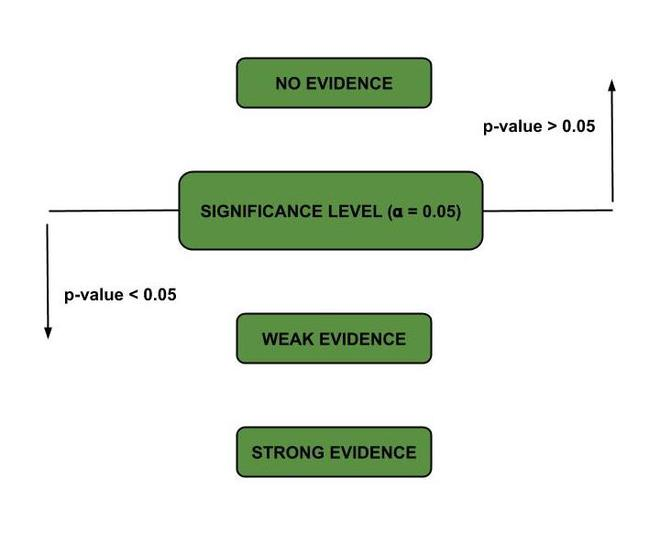

In [5]:
from IPython.display import Image
Image(filename='pvalue.jpg') 

n. 根据上题算出的 z-score 和 p-value，你认为新旧页面的转化率是否有区别？它们与 **j.** 与 **k.** 问题中的结果一致吗？

**在这里给出你的答案。**